In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV, Lasso
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.regressor import ManualAlphaSelection, AlphaSelection

Data preprocessing and one-hot encoding as described in Neural Network Development

In [2]:
dataset = pd.read_csv('complete_dataset_with_SF.csv')
dataset.drop('Unnamed: 0', 1, inplace=True) 
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True, drop=True)

Cell_line = dataset.pop("Cell Line")
Dose_Rate = dataset.pop("Dose Rate")
dataset['FIB10'] = (Cell_line=='FIB10') * 1
dataset['Fib34(a)'] = (Cell_line=='Fib34(a)') * 1
dataset['Fib34(b)'] = (Cell_line=='Fib34(b)') * 1
dataset['Fib34(c)'] = (Cell_line=='Fib34(c)') * 1
dataset['Fib31'] = (Cell_line=='Fib31') * 1
dataset['FAN1'] = (Cell_line=='FAN1') * 1
dataset['FAN2'] = (Cell_line=='FAN2') * 1
dataset['G36'] = (Cell_line=='G36') * 1
dataset['EBF'] = (Cell_line=='EBF') * 1
dataset['HF4 p4.1'] = (Cell_line=='HF4 p4.1') * 1
dataset['HF491'] = (Cell_line=='HF491') * 1
dataset['HF691'] = (Cell_line=='HF691') * 1
dataset['HDR'] = (Dose_Rate=='HDR') * 1
dataset['LDR'] = (Dose_Rate=='LDR') * 1
dataset.drop(['#Plated', 'PE', '#Counted'], 1, inplace=True)
print(dataset.shape)
dataset.describe()

(1228, 16)


,Dose,SF,FIB10,Fib34(a),Fib34(b),Fib34(c),Fib31,FAN1,FAN2,G36,EBF,HF4 p4.1,HF491,HF691,HDR,LDR
count,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,3.656694,0.275306,0.173453,0.223941,0.122150,0.087948,0.085505,0.026873,0.105049,0.051303,0.038274,0.024430,0.024430,0.036645,0.621336,0.378664
std,2.768387,0.389201,0.378792,0.417053,0.327592,0.283334,0.279745,0.161778,0.306741,0.220705,0.191934,0.154443,0.154443,0.187965,0.485252,0.485252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.004882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.110000,0.068395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.000000,0.447917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,10.900000,1.775457,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df_train_set = dataset.sample(frac=0.8, random_state=0)
df_test_set = dataset.drop(df_train_set.index)

train_labels = df_train_set.pop('SF')
test_labels = df_test_set.pop('SF')

train_labels = train_labels.to_numpy()
test_labels = test_labels.to_numpy()
train_labels = train_labels.reshape(-1,1)
test_labels = test_labels.reshape(-1,1)

In [4]:
scaler = MinMaxScaler()
train_set_norm = scaler.fit_transform(df_train_set)
test_set_norm = scaler.fit_transform(df_test_set)
train_labels_norm = scaler.fit_transform(train_labels)
test_labels_norm = scaler.fit_transform(test_labels)

# Linear Regression

In [5]:
linr = LinearRegression()
linr.fit(train_set_norm, train_labels_norm)

linr_test_pred = scaler.inverse_transform(linr.predict(test_set_norm))

print('Test MSE: ', mean_squared_error(test_labels,linr_test_pred))
print('Test R2: ', r2_score(test_labels,linr_test_pred))


Test MSE:  0.059984352850533586
Test R2:  0.585935323220474


# Ridge Regression

In [6]:
ridger = Ridge(alpha=0.425)
ridger.fit(train_set_norm, train_labels_norm)

ridger_test_pred = scaler.inverse_transform(ridger.predict(test_set_norm))

print('Test MSE: ', mean_squared_error(test_labels,ridger_test_pred))
print('Test R2: ', r2_score(test_labels,ridger_test_pred))

Test MSE:  0.0602059594008422
Test R2:  0.5844056002133023


# LASSO Regression

In [7]:
LASSOr = Ridge(alpha=0)
LASSOr.fit(train_set_norm, train_labels_norm)

LASSOr_test_pred = scaler.inverse_transform(LASSOr.predict(test_set_norm))

print('Test MSE: ', mean_squared_error(test_labels,LASSOr_test_pred))
print('Test R2: ', r2_score(test_labels,LASSOr_test_pred))

Test MSE:  0.06101012980440461
Test R2:  0.5788545099305343


# ElasticNet Regression

In [8]:
ENr = ElasticNet(alpha=0.001)
ENr.fit(train_set_norm, train_labels_norm)

ENr_test_pred = scaler.inverse_transform((ENr.predict(test_set_norm)).reshape(-1,1))

print('Test MSE: ', mean_squared_error(test_labels,ENr_test_pred))
print('Test R2: ', r2_score(test_labels,ENr_test_pred))

Test MSE:  0.060928275511501935
Test R2:  0.5794195401379655


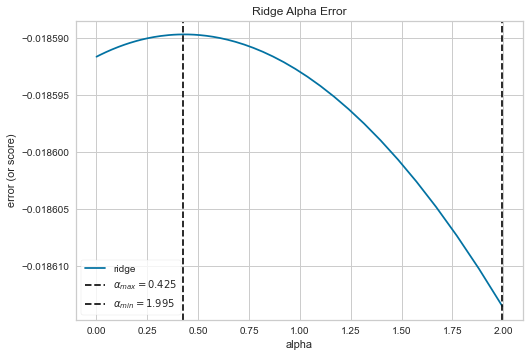

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [9]:
alphas = np.logspace(-10, 0.3, 400)
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=12,
    scoring="neg_mean_squared_error"
)
visualizer.fit(train_set_norm, train_labels_norm)
visualizer.show()

C:\Users\simon\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


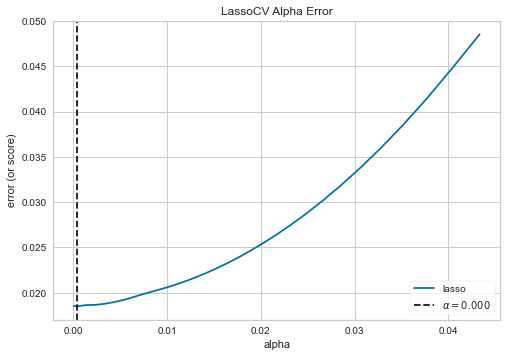

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [10]:
model = LassoCV()
visualizer = AlphaSelection(model)
visualizer.fit(train_set_norm, train_labels_norm)
visualizer.show()

C:\Users\simon\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


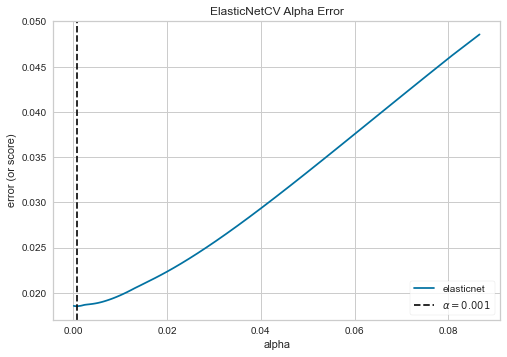

<AxesSubplot:title={'center':'ElasticNetCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [11]:
model = ElasticNetCV()
visualizer = AlphaSelection(model)
visualizer.fit(train_set_norm, train_labels_norm)
visualizer.show()